## **Feature Engineering**
***Process of creating new features or transforming your existing features to get the most out of your data.***
<hr>

> ### ***Creating New Features***
> Here are some methods to generator new features to make our model work better and have greater insights on the data(these are only sample methods):
> - *Length of text field*
> - *Percentage of characters that are punctuation in the text*
> - *Percentage of characters that are capitalized*
> <hr>
>
> ## **Transformations**
> We need to make transformation to the exsiting dataset to make the dataset better and more adaptive to our model.<br>
> Few examples:
> - *Power transformations* (square, square root, etc.)
> - *Standardizing data* (log transformations, etc.) - when we have a skewed data, or too much outliers. *This helps the model to draw correlations and better understand the data, without trying to overfit the data, also helps in model optimization.

<hr>

> ***Feature Creation***

In [1]:
# Read in raw text
import pandas as pd

data = pd.read_csv('SMSSpamCollection.tsv', sep='\t', header=None)
data.columns = ['label', 'text_body']

In [3]:
# Create feature for text message length
# Consider the hypothesis that spam messages tend to be longer than real text messages.

data['text_body_len'] = data['text_body'].apply(lambda x: len(x) - x.count(' '))   # subtract white-spaces from the text
data.head()

,label,text_body,text_body_length
0,ham,I've been searching for the right words to tha...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
2,ham,"Nah I don't think he goes to usf, he lives aro...",49
3,ham,Even my brother is not like to speak with me. ...,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28


In [12]:
# Create feature for % of the text that is punctuation
# Consider the hypothesis that real text messages use less punctiation than spam

import string

# function for counting punctuation
def count_punct(text):
    count = sum([1 for charater in text if charater in string.punctuation])
#     percent_count = len([charater for charater in text if charater in string.punctuation]) 
    return round(count / (len(text) - text.count(' ')), 3)*100

# creating new feature in the dataset
data['punct_percent'] = data['text_body'].apply(lambda x: count_punct(x))
data.head()

,label,text_body,text_body_length,punct_percent
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


In [17]:
# Create feature for % of charaters that are capitalized

import re

# function for counting capital charaters
def count_cap(text):
    count = sum([1 for charater in text if charater.isupper()])
    # count = len([re.findall('[A-Z]', text)])
    return round(count / (len(text) - text.count(' ')),3)*100

# create new feature in the dataset
data['cap_percent'] = data['text_body'].apply(lambda x: count_cap(x))
data.head()

,label,text_body,text_body_length,punct_percent,cap_percent
0,ham,I've been searching for the right words to tha...,160,2.5,1.9
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7,7.8
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1,92.9


> ***Evaluate created features***<br>
> Evaluate new features to see if they might be `providing any new value to the model` for distinguishing spam from non-spam<br>
> Use overlayed histograms for this purpose

In [19]:
# Evaluate created features

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/home/nilesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys
/home/nilesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


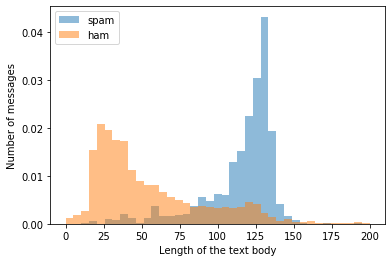

In [28]:
#evaluate 'text_body_length' feature

# set bins 
bins = np.linspace(0,200,40)     # returns 40 evenly spaces numbers(40 bins) between 0 and 200. 
                                 # 0 is the starting point and 200 is the limit of max text length
                                 # this basically determines where our cutpoints are placed for the new bins
    
# histogram to look at the distribution of our body length for spam
plt.hist(data[data['label']=='spam']['text_body_length'], bins=bins, alpha=0.5, normed=True, label='spam')   
        # alpha parameter -> how dark shoud be the plot [shading parameter]
        # normedd parameter -> to normalize the plot to same scale

# histogram to look at the distribution of out body length for non-spam
plt.hist(data[data['label']=='ham']['text_body_length'], bins=bins, alpha=0.5, normed=True, label='ham')

plt.legend(loc='upper left')
plt.xlabel('Length of the text body')
plt.ylabel('Number of messages')
plt.show()

> Thus it is evident to see that the text body length for spam messages is `significantly high` as compared to the ham messages<br>
> *This feature will be extra helpful for the model to distinguish ham from spam*

/home/nilesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys
/home/nilesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


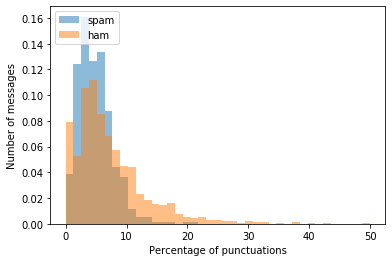

In [29]:
#evaluate 'punct_percent' feature

# set bins 
bins = np.linspace(0,50,40)     # returns 40 evenly spaces numbers(40 bins) between 0 and 50(limiting max percentage of punctuation). 
                                 
# histogram to look at the distribution of our punctuation percentage for spam
plt.hist(data[data['label']=='spam']['punct_percent'], bins=bins, alpha=0.5, normed=True, label='spam')   
        
# histogram to look at the distribution of out punctuation percentage for non-spam
plt.hist(data[data['label']=='ham']['punct_percent'], bins=bins, alpha=0.5, normed=True, label='ham')

plt.legend(loc='upper left')
plt.xlabel('Percentage of punctuations')
plt.ylabel('Number of messages')
plt.show()

> - Thus not a great new feature, but a descent feature and can provide some value to the model, as spam tends to have high number of messages in lower percentage of punctuations but there are more ham messages in later plot(ham has a tail with higher number after 10%),<br>
> - *Not a great feature to distunguish ham from spam, but its okay to keep this feature as it will surely add atleast some value to the model*. Out hypothesis becomes correct here.
<hr>

> #### ***Tranformations***
> - **Process that alters each data point in a certain column in a systematic way. (eg., $-x^{2}, \sqrt{x}$)**<br>
> 
> Now that we have generated new features, we will see wheather either of them might be fit for a transformation.

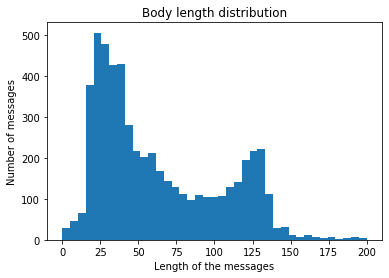

In [31]:
# plot the new features

bins = np.linspace(0,200,40)

plt.hist(data['text_body_length'], bins=bins)
plt.title('Body length distribution')
plt.xlabel('Length of the messages')
plt.ylabel('Number of messages')
plt.show()

> - Here it can be seen that the histograms have ***2 local maximas(high points)***.
> - It is quite evident that the `rightmost high` belongs to the **spam messages** and `left` one belong to **ham**.
> - There is a considerable distribution between spam and ham. 
> - Hence, there is `no need of transforming` this feature, we can directly use this feature for training our model.

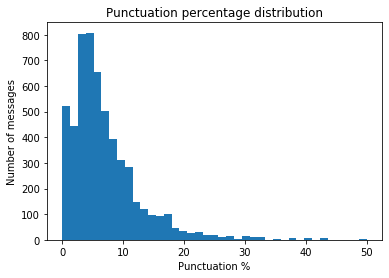

In [32]:
bins = np.linspace(0,50,40)

plt.hist(data['punct_percent'], bins=bins)
plt.title('Punctuation percentage distribution')
plt.xlabel('Punctuation %')
plt.ylabel('Number of messages')
plt.show()

> - This distribution is fairly ***`skewed`***, and hence a perfect candidate for transformation.
> - There is also a tail, thus it has ***`outliers`*** too!
> - This type of feature distribution might `generate a biased model`
> - Thus we ***Transform*** this new feature.
<hr>

> #### **Transform the punctuation % feature**
>
> ### ***`Box-Cox Power Transformation`***
> - ***Base form: $y^x$***.   
>    - y-> value in an individual cell, 
>    - x-> exponent with wich you want to pull your distribution]
> - example.
> <img src='Box-Cox Power Transformation.png'>
> - Thus from the above picture you can see that how different power transformation affect our values. Do choose the transformation according to your application. (eg., for a left skewed distribution, log transformation is a good idea to pool the distribution towards its tail)
> <hr>

> ***Transformation Process***<br>
> * Determine what range of exponents to test.
> - Apply each transformation to each value of your chosen feature.
> - Use some criteria to determine which of the transformations yeild the best distribution. (choose the one which looks like normal distribution - best way to choose!!!)

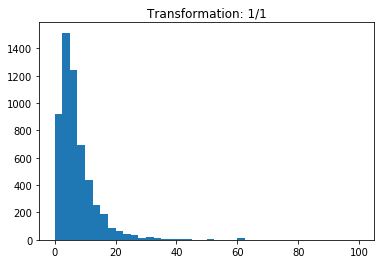

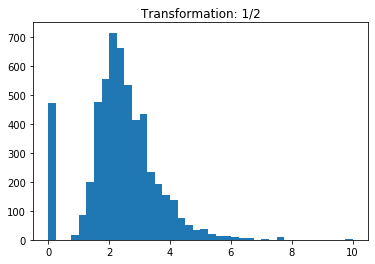

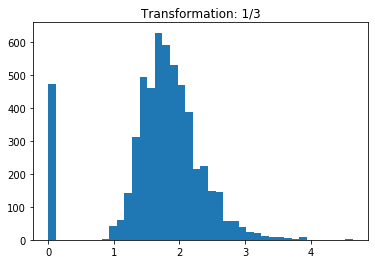

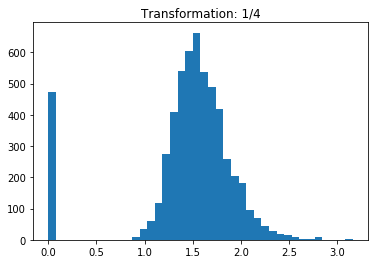

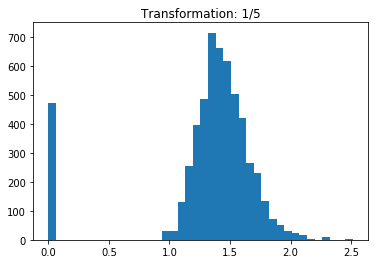

In [34]:
# transformation process

for i in [1,2,3,4,5]:     # looping in through different power exponents
    plt.hist((data['punct_percent'])**(1/i), bins=40)
    plt.title(f"Transformation: 1/{i}")
    plt.show()

> It is self evident to watch that the `transformations 1/4 and 1/5` are the best ones and we can go forward with any one of them.

> Thus Transformations help your model to leverage it to make predictions in a cleaner way.